In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib

import sys
sys.path.append('/../../temp_prog/')
import vb_epsilon_sweeper as vs
import interpolation_runner as ip
import file_handler as fh

In [2]:
#FINDING TUR-VIOLATION REGIME


#--SETUP: ---------------------------------------------------------------------------------
VBs = np.linspace(0,0.5, 200) # np.linspace(-10000,10000, 100)
epsilons = np.linspace(0, 2.1, 200) # np.linspace(-6000, 6000, 10)
#T = 1
T_L = 2.5 #100
T_R = 1 #T_L
omega = 0.002
u_intra = 1000
u_inter = 800
gammaL = 0.005
gammaR = 0.005

INPUT = {
    'omega': omega, #1000
    'u_intra': u_intra, #2000
    'u_inter': u_inter, #1000
    'gammaL': gammaL, #0.5
    'gammaR': gammaR, #0.5
    'T_L': T_L,
    'T_R': T_R,
}

#--SETUP: ---------------------------------------------------------------------------------

importlib.reload(vs)
I, I_var, J_QH, P, P_0 = vs.run_sweep(VBs, epsilons, **INPUT)

In [3]:
if T_L < T_R:
    raise SystemExit("Not my convention! (T_L < T_R)")
elif T_L > T_R:
    T_COLD = T_R
    T_HOT = T_L
#elif T_L == T_R:

#Calculations of efficiency, sigma and TUR
eff_carnot = 1-(T_COLD/T_HOT)
eff = P/J_QH
P[(P < 0)] = np.nan
sigma = P*(1/T_COLD)*(eff_carnot-eff)/eff
TUR = I_var*sigma/(I**2)
print(np.sort(TUR[~np.isnan(TUR)]))

[ 1.96635424  1.96635799  1.96636103 ... 37.08479273 37.39872347
 37.71552942]


C:\Users\ag3830he\AppData\Local\Temp\ipykernel_14844\3275617505.py:12: RuntimeWarning: invalid value encountered in divide
  sigma = P*(1/T_COLD)*(eff_carnot-eff)/eff


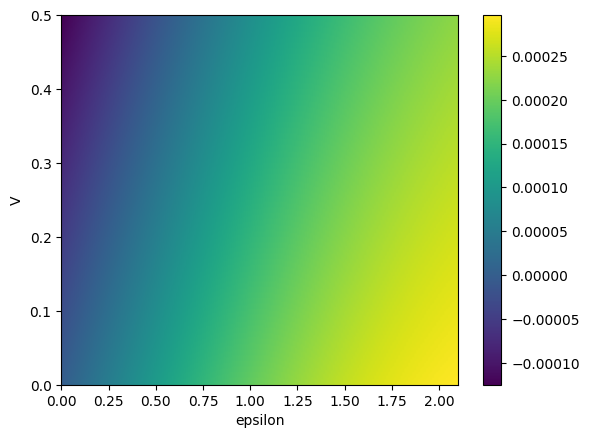

Text(0, 0.5, 'V')

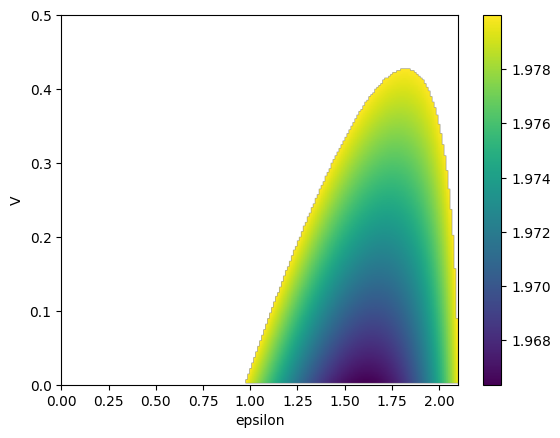

In [4]:
img = plt.imshow(I, extent=[epsilons[0], epsilons[-1], VBs[0], VBs[-1]], aspect='auto', origin='lower')
plt.colorbar()
plt.xlabel('epsilon')
plt.ylabel('V')
#img.set_clim(-0.1, 0.1)  # Set color limits
plt.show()

TUR_masked = np.ma.masked_where(TUR >= 1.98, TUR)

img = plt.imshow(TUR_masked, extent=[epsilons[0], epsilons[-1], VBs[0], VBs[-1]], aspect='auto', origin='lower')
plt.colorbar()
plt.xlabel('epsilon')
plt.ylabel('V')
#for row in indices:
#    plt.scatter(Epsilon[row[0], row[1]],VB[row[0],row[1]],marker="o")
#img.set_clim(-0.1, 0.1)  # Set color limits

In [5]:
#Finding minimal TUR index

min_idx = np.argwhere(TUR == np.nanmin(TUR))
if len(min_idx) > 1:
    print("WARNING!! SOMETHING WIERD!") 
else:
    min_idx = min_idx[0]

print(TUR[min_idx[0],min_idx[1]])

Epsilon, VB = np.meshgrid(epsilons, VBs)
print("Epsilon:", Epsilon[1,15])
print("VB:", VB[1,15])

1.9663542385246997
Epsilon: 0.15829145728643218
VB: 0.002512562814070352


In [ ]:
#--SETUP: ---------------------------------------------------------------------------------
epsilons = np.linspace(0, 2.1, 20) # np.linspace(-6000, 6000, 10)



INPUT = {
    'omega': 0.002, #1000
    'u_intra': 1000, #2000
    'u_inter': 800, #1000
    'gammaL': 0.005, #0.5
    'gammaR': 0.005, #0.5
    'T_L': T_L,
    'T_R': T_R,
}

#--SETUP: ---------------------------------------------------------------------------------
epsilons = np.linspace(-100, 100, 10)
lamdas = np.linspace(0,1,12)
T_L = 10
T_R = 1

if T_L > T_R:
    T_COLD = T_R
    T_HOT = T_L

INPUT = {
    'omega': 0.105,
    'u_intra': 500,
    'u_inter': 300,
    'V_B': 50,
    'gammaL': 0.1,
    'gammaR': 0.105,
    'T_L': T_L,
    'T_R': T_R,
}
       

In [7]:
I, I_var, J_QH, P, eff, sigma, TUR = ip.run_interpolation(epsilons, lamdas, **INPUT)

c:\../../temp_prog\interpolation_runner.py:49: UserWarning: Warning! Negative noise! -485169.89863986184 for lambda: 1.0 and epsilon: -100.0
 (I = -0.15315567102980845, J_QH = 11.486661273010927)
  warnings.warn(f"Warning! Negative noise! {i_var} for lambda: {lmda} and epsilon: {eps}\n (I = {i}, J_QH = {j_qh})")
c:\../../temp_prog\interpolation_runner.py:49: UserWarning: Warning! Negative noise! -6894048033.667898 for lambda: 1.0 and epsilon: -55.55555555555556
 (I = -0.11337378248309135, J_QH = 3.464198907802923)
  warnings.warn(f"Warning! Negative noise! {i_var} for lambda: {lmda} and epsilon: {eps}\n (I = {i}, J_QH = {j_qh})")
